## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [8]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp_l1(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_l2(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_l1l2(input_shape, output_units=10, num_neurons=[512, 256, 128], l1l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1l2_ratio, l1l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1l2_ratio, l1l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 69us/step - loss: 6.0078 - acc: 0.2753 - val_loss: 5.8139 - val_acc: 0.3373
Epoch 2/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.7155 - acc: 0.3687 - val_loss: 5.6343 - val_acc: 0.3828
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.5699 - acc: 0.3984 - val_loss: 5.5039 - val_acc: 0.4104
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.4505 - acc: 0.4167 - val_loss: 5.3914 - val_acc: 0.4277
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 5.3418 - acc: 0.4302 - val_loss: 5.2980 - val_acc: 0.4337
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.2421 - acc: 0.4439 - val_loss: 5.2027 - val_acc: 0.4470
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 5.1474 - acc: 0.4573 - val_loss: 5.1209 - val_acc

50000/50000 [==============================] - 3s 61us/step - loss: 1.7990 - acc: 0.3683 - val_loss: 1.7529 - val_acc: 0.3780
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7177 - acc: 0.3996 - val_loss: 1.6917 - val_acc: 0.4071
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.6605 - acc: 0.4201 - val_loss: 1.6389 - val_acc: 0.4267
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6127 - acc: 0.4383 - val_loss: 1.5986 - val_acc: 0.4366
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5750 - acc: 0.4500 - val_loss: 1.5682 - val_acc: 0.4549
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5424 - acc: 0.4602 - val_loss: 1.5518 - val_acc: 0.4539
Epoch 8/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5115 - acc: 0.4706 - val_loss: 1.5258 - val_acc: 0.4648
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 61us/step - loss: 1.7263 - acc: 0.3923 - val_loss: 1.6934 - val_acc: 0.4078
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6679 - acc: 0.4142 - val_loss: 1.6533 - val_acc: 0.4181
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6228 - acc: 0.4299 - val_loss: 1.6119 - val_acc: 0.4322
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5822 - acc: 0.4443 - val_loss: 1.5799 - val_acc: 0.4474
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5499 - acc: 0.4536 - val_loss: 1.5425 - val_acc: 0.4587
Epoch 8/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5182 - acc: 0.4662 - val_loss: 1.5300 - val_acc: 0.4590
Epoch 9/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4909 - acc: 0.4749 - val_loss: 1.5060 - val_acc: 0.4626
Epoch 10/50
50000/50000 [===========================

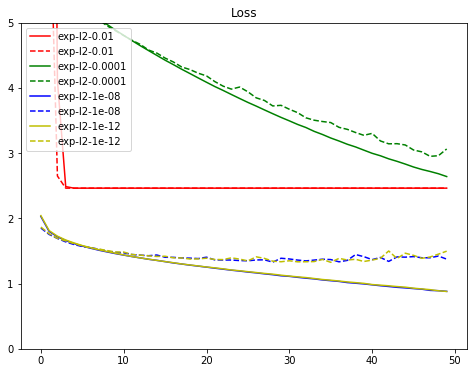

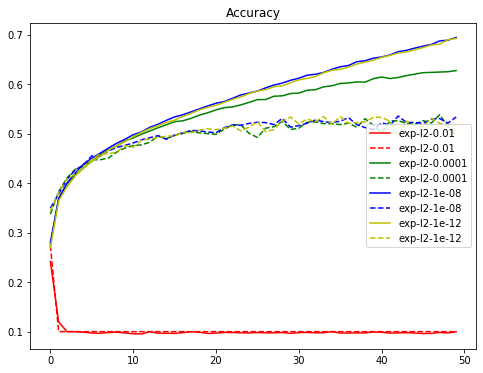

In [13]:
#L1 regularizer

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.1487 - acc: 0.2768 - val_loss: 1.9978 - val_acc: 0.3442
Epoch 2/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.9365 - acc: 0.3671 - val_loss: 1.8878 - val_acc: 0.3819
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8547 - acc: 0.3998 - val_loss: 1.8248 - val_acc: 0.4080
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7981 - acc: 0.4194 - val_loss: 1.7872 - val_acc: 0.4207
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7523 - acc: 0.4348 - val_loss: 1.7453 - val_acc: 0.4333
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7135 - acc: 0.4495 - val_loss: 1.7175 - val_acc: 0.4418
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6792 - acc: 0.4607 - val_loss: 1.6848 - val_acc

50000/50000 [==============================] - 4s 88us/step - loss: 1.8048 - acc: 0.3688 - val_loss: 1.7617 - val_acc: 0.3806
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7172 - acc: 0.4008 - val_loss: 1.6949 - val_acc: 0.4082
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6584 - acc: 0.4197 - val_loss: 1.6614 - val_acc: 0.4107
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6124 - acc: 0.4351 - val_loss: 1.6009 - val_acc: 0.4376
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5735 - acc: 0.4493 - val_loss: 1.5741 - val_acc: 0.4454
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5389 - acc: 0.4596 - val_loss: 1.5426 - val_acc: 0.4568
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5104 - acc: 0.4700 - val_loss: 1.5216 - val_acc: 0.4643
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 59us/step - loss: 1.7208 - acc: 0.3987 - val_loss: 1.6947 - val_acc: 0.4070
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6583 - acc: 0.4203 - val_loss: 1.6416 - val_acc: 0.4243
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6123 - acc: 0.4349 - val_loss: 1.5977 - val_acc: 0.4385
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5717 - acc: 0.4489 - val_loss: 1.5938 - val_acc: 0.4421
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5397 - acc: 0.4591 - val_loss: 1.5427 - val_acc: 0.4564
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5091 - acc: 0.4705 - val_loss: 1.5161 - val_acc: 0.4630
Epoch 9/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4838 - acc: 0.4790 - val_loss: 1.4965 - val_acc: 0.4705
Epoch 10/50
50000/50000 [===========================

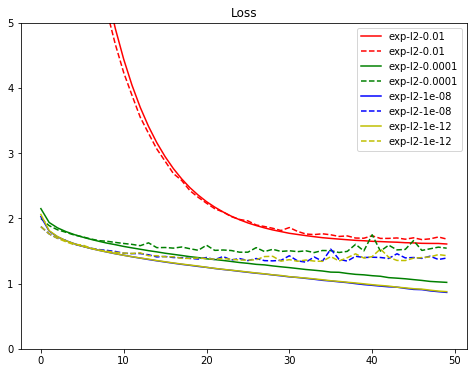

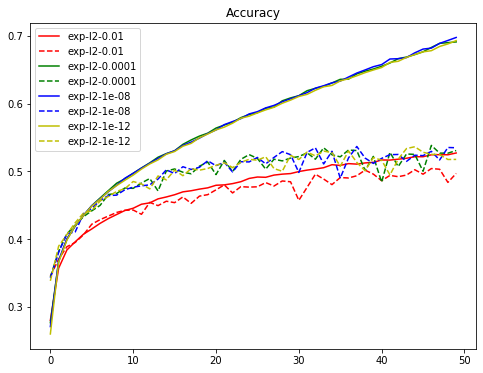

In [15]:
#L2 regularizer

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l2(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 77us/step - loss: 6.1329 - acc: 0.2783 - val_loss: 5.9443 - val_acc: 0.3440
Epoch 2/50
50000/50000 [==============================] - 3s 63us/step - loss: 5.8508 - acc: 0.3676 - val_loss: 5.7674 - val_acc: 0.3822
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 5.6971 - acc: 0.3958 - val_loss: 5.6254 - val_acc: 0.4105
Epoch 4/50
50000/50000 [==============================] - 4s 74us/step - loss: 5.5689 - acc: 0.4177 - val_loss: 5.5078 - val_acc: 0.4267
Epoch 5/50
50000/50000 [==============================] - 4s 71us/step - loss: 5.4542 - acc: 0.4321 - val_loss: 5.3991 - val_acc: 0.4361
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 5.3479 - acc: 0.4453 - val_loss: 5.3012 - val_acc: 0.4483: 0s - loss: 5.3623
Epoch 7/50
50000/50000 [==============================] - 3s 66us/step - loss: 5.2482 - acc: 0.4575 - val_los

50000/50000 [==============================] - 3s 62us/step - loss: 1.7889 - acc: 0.3724 - val_loss: 1.7387 - val_acc: 0.3936
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7040 - acc: 0.4038 - val_loss: 1.6718 - val_acc: 0.4163
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6441 - acc: 0.4258 - val_loss: 1.6204 - val_acc: 0.4320
Epoch 5/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5986 - acc: 0.4416 - val_loss: 1.5946 - val_acc: 0.4351
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5578 - acc: 0.4562 - val_loss: 1.5718 - val_acc: 0.4479
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5251 - acc: 0.4654 - val_loss: 1.5368 - val_acc: 0.4508
Epoch 8/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4930 - acc: 0.4760 - val_loss: 1.5044 - val_acc: 0.4710
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 62us/step - loss: 1.7290 - acc: 0.3927 - val_loss: 1.6933 - val_acc: 0.4046
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6667 - acc: 0.4163 - val_loss: 1.6488 - val_acc: 0.4182
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6167 - acc: 0.4349 - val_loss: 1.5994 - val_acc: 0.4389
Epoch 6/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5761 - acc: 0.4489 - val_loss: 1.5709 - val_acc: 0.4448
Epoch 7/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5428 - acc: 0.4586 - val_loss: 1.5446 - val_acc: 0.4519
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5114 - acc: 0.4700 - val_loss: 1.5258 - val_acc: 0.4593
Epoch 9/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.4849 - acc: 0.4814 - val_loss: 1.4974 - val_acc: 0.4687
Epoch 10/50
50000/50000 [===========================

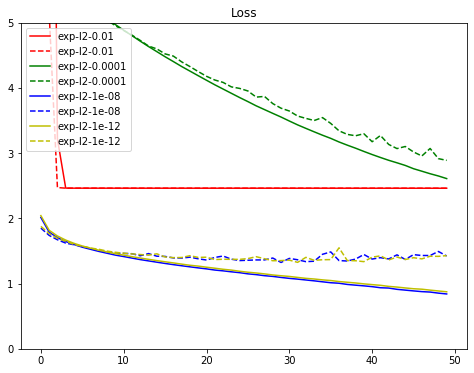

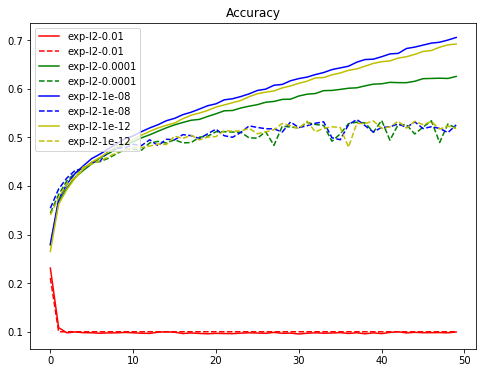

In [16]:
#L1L2 regularizer

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l1l2(input_shape=x_train.shape[1:], l1l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()